In [13]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load & open hotel descriptions JSON into a DataFrame
with open("../../Extract/hotels/data/hotels_descriptions.json", "r", encoding="utf-8") as f:
    data = json.load(f)  

# Convert the JSON data into a Pandas DataFrame for analysis
df_hotels = pd.DataFrame(data)
print(df_hotels.head())

  location                                               name rating  \
0    Rouen  Sous les Etoiles - dans le plus haut gratte-ci...    9,2   
1    Rouen  L'Oasis Rouennais - Hypercentre - Gare rive Ga...     10   
2    Rouen                   Radisson Blu Hotel, Rouen Centre    8,9   
3    Paris                                Studio à Montmartre    8,0   
4    Paris              Apartment Cosy 3P Quartier République   None   

                                                 url  \
0  https://www.booking.com/hotel/fr/sous-les-etoi...   
1  https://www.booking.com/hotel/fr/oasis-rouenna...   
2  https://www.booking.com/hotel/fr/radisson-blu-...   
3  https://www.booking.com/hotel/fr/studio-a-mont...   
4  https://www.booking.com/hotel/fr/apartment-cos...   

                                         description  \
0  L’hébergement Sous les Etoiles - dans le plus ...   
1  L’hébergement L'Oasis Rouennais - Hypercentre ...   
2  L’établissement Radisson Blu Hotel, Rouen Cent...   
3  Off

In [15]:
# Check for missing values in the dataset
# Count the number of NULL values per column
print("Number of NULL values per column:")
print(df_hotels.isnull().sum())

# Display rows that contain at least one NULL value
print("\nRows containing at least one NULL value:")
print(df_hotels[df_hotels.isnull().any(axis=1)])

Number of NULL values per column:
location        0
name            0
rating         18
url             0
description     1
coordinates     0
dtype: int64

Rows containing at least one NULL value:
                         location  \
4                           Paris   
33                          Dijon   
107  Chateau du Haut Koenigsbourg   
313                         Paris   
315                         Paris   
318                         Paris   
323                         Paris   
356                         Paris   
452                     Montauban   
469                        Ariege   
471                        Ariege   
626               Aix en Provence   
627               Aix en Provence   
646      Saintes Maries de la mer   
712                        Cassis   
744            Bormes les Mimosas   
778                          Lyon   
784                          Lyon   
836                   La Rochelle   

                                                  name rating 

In [16]:
# Inspect hotels with missing ratings 
# Filter the DataFrame to show only rows where 'rating' is NaN
print("Hotels without rating:")
print(df_hotels[df_hotels["rating"].isna()])

Hotels without rating:
                         location  \
4                           Paris   
33                          Dijon   
107  Chateau du Haut Koenigsbourg   
313                         Paris   
315                         Paris   
318                         Paris   
323                         Paris   
356                         Paris   
469                        Ariege   
471                        Ariege   
626               Aix en Provence   
627               Aix en Provence   
646      Saintes Maries de la mer   
712                        Cassis   
744            Bormes les Mimosas   
778                          Lyon   
784                          Lyon   
836                   La Rochelle   

                                                  name rating  \
4                Apartment Cosy 3P Quartier République   None   
33             Mini loft de Charme au cœur de la ville   None   
107                                 Au pied du Château   None   
313      Spac

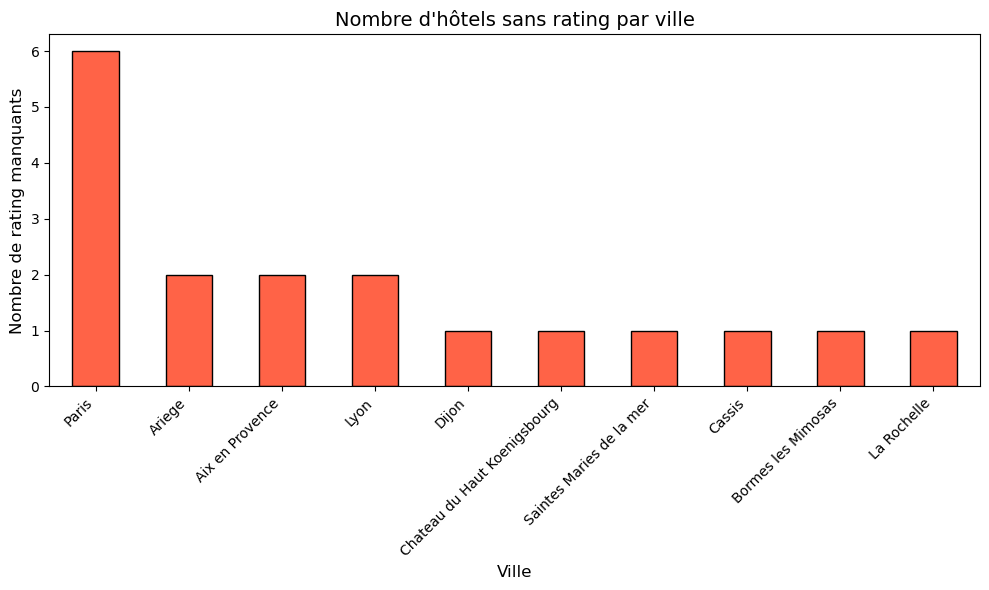

In [17]:
# Count missing ratings per city 
missing_ratings = df_hotels[df_hotels["rating"].isna()]   # filter only missing ratings
missing_count = missing_ratings["location"].value_counts() 

plt.figure(figsize=(10, 6))
missing_count.plot(kind="bar", color="tomato", edgecolor="black")

plt.title("Nombre d'hôtels sans rating par ville", fontsize=14)
plt.xlabel("Ville", fontsize=12)
plt.ylabel("Nombre de rating manquants", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


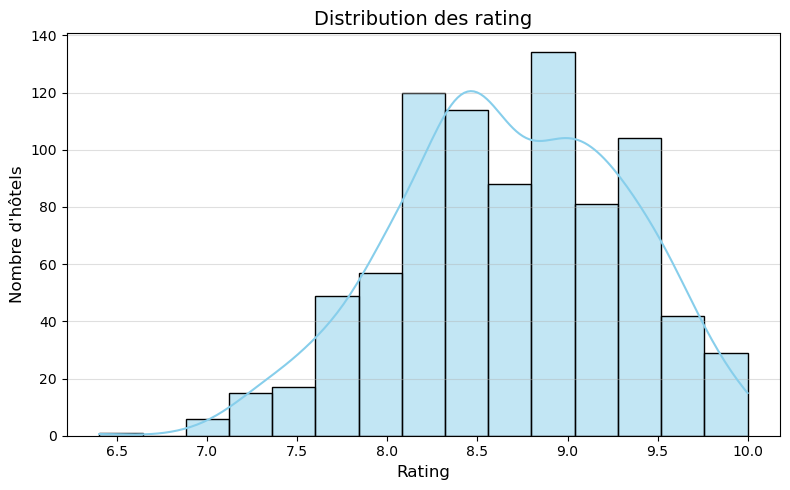

In [5]:
# Clean the 'rating' column 
# Replace commas with dots and convert to float
df_hotels["rating_clean"] = (
    df_hotels["rating"]
    .str.replace(",", ".", regex=False)
    .astype(float)
)

# Plot histogram + density curve 
plt.figure(figsize=(8, 5))
sns.histplot(
    df_hotels["rating_clean"].dropna(),
    bins=15,
    kde=True,                
    color="skyblue",
    edgecolor="black"
)

plt.title("Distribution des rating", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Nombre d'hôtels", fontsize=12)
plt.grid(axis="y", alpha=0.4)
plt.tight_layout()
plt.show()

In [12]:
best_hotel_per_city = (
    df_hotels.loc[df_hotels.groupby("location")["rating"].idxmax(), ["location", "name", "rating"]]
    .sort_values(by="rating", ascending=False)
    .reset_index(drop=True)
)

best_hotel_per_city


,location,name,rating
0,Aigues Mortes,La maison blanche Intra-Muros Free parking,"9,9"
1,Bayeux,L'Atelier,"9,9"
2,Grenoble,Appartement Hagaki vue panoramique proche gare...,"9,9"
3,Cassis,LE SEPT charmant studio aux portes des calanques,"9,9"
4,Uzes,La DAME de FLAUX,"9,9"
5,Avignon,Apartment 40m2-Air conditioning-Elevator-Under...,"9,8"
6,Chateau du Haut Koenigsbourg,Villa Grimm,"9,8"
7,Saint-Malo,Studio Le sillon malouin vue mer,"9,8"
8,N%C3%AEmes,Appartement T3 proches arènes,"9,8"
9,Marseille,SV - Au Pied du Vieux Port,"9,8"
